<a href="https://colab.research.google.com/github/AkashJahid/STHPP/blob/main/DPC_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import matthews_corrcoef

In [ ]:
df_tr = pd.read_csv('/content/DPC Training.csv')
df_ts = pd.read_csv('/content/dpc testing.csv')

In [ ]:
columns = df_tr.columns.tolist()
columns = [c for c in columns if c not in ['Target']]
target = 'Target'
xtrain = df_tr[columns]
ytrain = df_tr[target]

In [ ]:
columns = df_ts.columns.tolist()
columns = [c for c in columns if c not in ['Target']]
target = 'Target'
xtest = df_ts[columns]
ytest = df_ts[target]

**Cross Valadiation**

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

algorithm define : **Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators = 500, max_depth = 50)

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.8868288914638857, 0.8780276816608996, 0.869751499571551, 0.8738699956952217)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.7665226672159271

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1281,  141],
       [ 152, 1015]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.869751499571551
Specificity: 0.9008438818565401


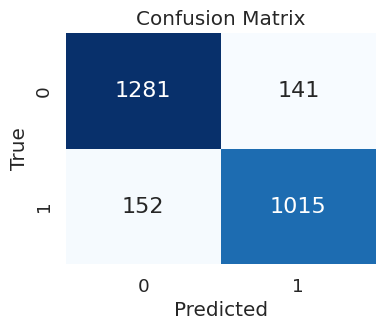

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Independent Test**

In [ ]:
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=50, n_estimators=500)

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9384615384615385,
 0.9384615384615385,
 0.9384615384615385,
 0.9384615384615385)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.8773384834252591

In [ ]:
cm=confusion_matrix(ytest,pred)

In [ ]:
cm

array([[122,   8],
       [  8, 122]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9384615384615385
Specificity: 0.9384615384615385


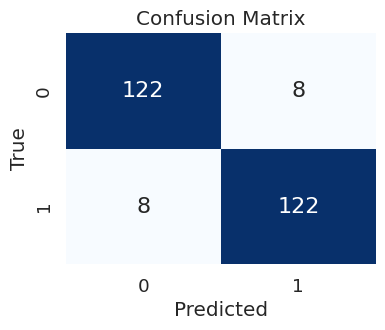

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

xb booster

In [ ]:
model = XGBClassifier(n_estimators = 500,max_depth = 7, base_score = 0.88, learning_rate = 0.2)


In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

Cross Valadiation

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9061413673232909,
 0.8660855784469097,
 0.9365895458440445,
 0.8999588307945656)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8133077370325277

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1253,  169],
       [  74, 1093]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9365895458440445
Specificity: 0.8811533052039381


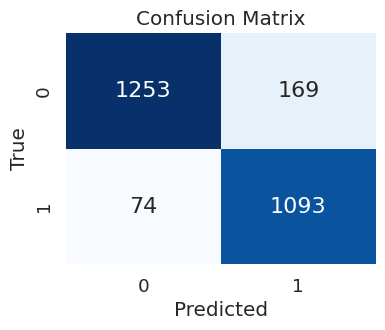

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

indipendent test

In [ ]:
model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.88, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9653846153846154,
 0.9416058394160584,
 0.9923076923076923,
 0.9662921348314606)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.9321215121016421

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[122,   8],
       [  1, 129]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9923076923076923
Specificity: 0.9384615384615385


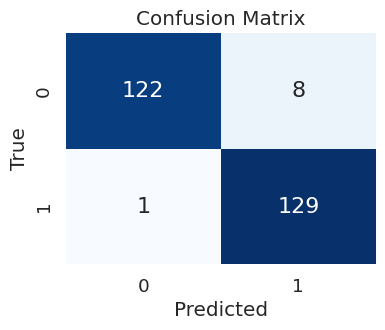

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**LGBM**

In [ ]:
model = LGBMClassifier(max_depth=7, learning_rate=0.5)

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.8933951332560834,
 0.8595641646489104,
 0.9125964010282777,
 0.8852867830423939)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.787114916736394

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1248,  174],
       [ 102, 1065]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9125964010282777
Specificity: 0.8776371308016878


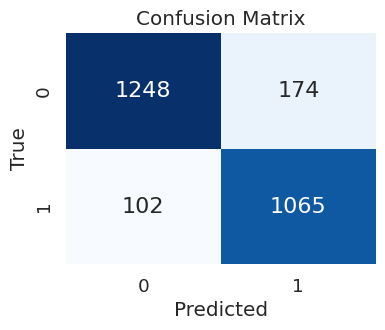

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1167, number of negative: 1422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4714
[LightGBM] [Info] Number of data points in the train set: 2589, number of used features: 380
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450753 -> initscore=-0.197628
[LightGBM] [Info] Start training from score -0.197628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

LGBMClassifier(learning_rate=0.5, max_depth=7)

In [ ]:
pred = model.predict(xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9538461538461539,
 0.9402985074626866,
 0.9692307692307692,
 0.9545454545454547)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.9081222898612332

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[122,   8],
       [  4, 126]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9692307692307692
Specificity: 0.9384615384615385


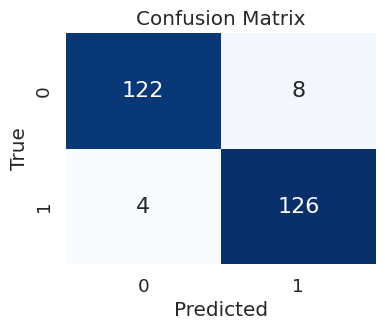

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**CAT** **BOOSTER**

In [ ]:
model = CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028)


In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.8725376593279258,
 0.8655021834061135,
 0.8491859468723222,
 0.8572664359861591)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.7422518952832101

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1268,  154],
       [ 176,  991]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8491859468723222
Specificity: 0.8917018284106891


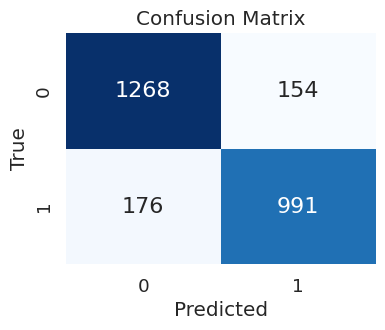

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

0:	learn: 0.6483052	total: 125ms	remaining: 6.63s
1:	learn: 0.6174643	total: 203ms	remaining: 5.28s
2:	learn: 0.5942044	total: 288ms	remaining: 4.9s
3:	learn: 0.5751181	total: 390ms	remaining: 4.88s
4:	learn: 0.5478260	total: 468ms	remaining: 4.58s
5:	learn: 0.5305191	total: 549ms	remaining: 4.39s
6:	learn: 0.5165084	total: 636ms	remaining: 4.27s
7:	learn: 0.4996331	total: 718ms	remaining: 4.13s
8:	learn: 0.4858421	total: 795ms	remaining: 3.98s
9:	learn: 0.4764122	total: 877ms	remaining: 3.86s
10:	learn: 0.4650591	total: 957ms	remaining: 3.74s
11:	learn: 0.4535992	total: 1.04s	remaining: 3.65s
12:	learn: 0.4450380	total: 1.13s	remaining: 3.55s
13:	learn: 0.4367309	total: 1.21s	remaining: 3.46s
14:	learn: 0.4274544	total: 1.37s	remaining: 3.56s
15:	learn: 0.4204832	total: 1.52s	remaining: 3.61s
16:	learn: 0.4146019	total: 1.68s	remaining: 3.65s
17:	learn: 0.4047178	total: 1.82s	remaining: 3.63s
18:	learn: 0.3980420	total: 1.97s	remaining: 3.62s
19:	learn: 0.3919588	total: 2.11s	remainin

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9153846153846154, 0.921875, 0.9076923076923077, 0.9147286821705427)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.8308675641104959

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[120,  10],
       [ 12, 118]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.9076923076923077
Specificity: 0.9230769230769231


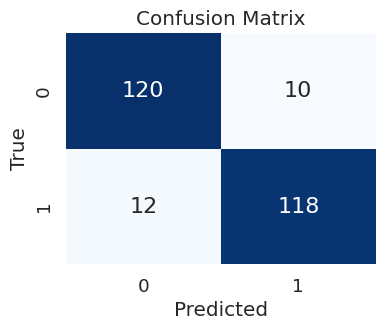

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Stacking**

In [ ]:
estimator = [('RF',RandomForestClassifier(n_estimators = 400, max_depth = 10)),
             ('XGB',XGBClassifier(n_estimators = 500,max_depth = 7, base_score = 0.88, learning_rate = 0.2)),
             ('LGBM',LGBMClassifier(max_depth=7, learning_rate=0.5)),
             ('CAT',CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028))]
model = StackingClassifier(estimators=estimator, final_estimator=CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028))

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9061413673232909, 0.8989637305699482, 0.8920308483290489, 0.895483870967742)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8127562676713346

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1305,  117],
       [ 126, 1041]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8920308483290489
Specificity: 0.9177215189873418


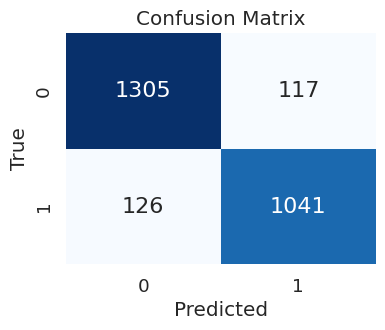

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1167, number of negative: 1422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4714
[LightGBM] [Info] Number of data points in the train set: 2589, number of used features: 380
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450753 -> initscore=-0.197628
[LightGBM] [Info] Start training from score -0.197628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=400)),
                               ('XGB',
                                XGBClassifier(base_score=0.88, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=Non...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('LGBM',
                                LGBMClassifier(learning_rate=0.5, max_depth=7)),
                               ('CAT',
                                <catboost.core.CatBoostClassifier object at 0x7f0c97da6e00>)],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7f0c97da6aa0>)

In [ ]:
pred = model.predict(xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9653846153846154,
 0.9689922480620154,
 0.9615384615384616,
 0.9652509652509652)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.930796769542578

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[126,   4],
       [  5, 125]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9615384615384616
Specificity: 0.9692307692307692


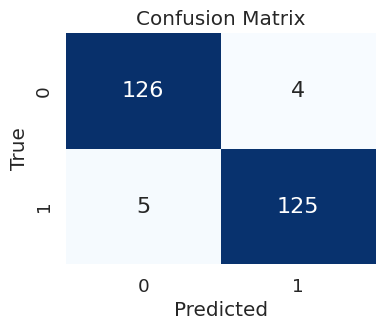

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()